In [1]:
import os
import struct
import zipfile
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

root = 'E:/OCR/CASIA/data'  # CASI 数据集所在根目录
image_s = [f'{root}/{name}' for name in os.listdir(root) if 'gnt' in name] # 图片的源文件
image_s

['E:/OCR/CASIA/data/HWDB1.0trn_gnt.zip',
 'E:/OCR/CASIA/data/HWDB1.0tst_gnt.zip',
 'E:/OCR/CASIA/data/HWDB1.1trn_gnt.zip',
 'E:/OCR/CASIA/data/HWDB1.1tst_gnt.zip']

## GNT

In [2]:
class GNT:
    # GNT 文件的解码器
    def __init__(self, Z, set_name):
        self.Z = Z
        self.set_name = set_name # 数据集名称
    def __iter__(self):
        with self.Z.open(self.set_name) as fp:
            head = True
            while head:
                head = fp.read(4)
                if not head: # 判断文件是否读到结尾
                    break # 读到文件结尾立即结束
                head = struct.unpack('I', head)[0]
                tag_code = fp.read(2).decode('gb2312-80')
                width, height = struct.unpack('2H', fp.read(4))
                bitmap = np.frombuffer(fp.read(width*height), np.uint8)
                img = bitmap.reshape((height, width))
                yield img, tag_code

In [3]:
Z = zipfile.ZipFile(f'{root}/HWDB1.0trn_gnt.zip')
Z.namelist()

['1.0train-gb1.gnt']

In [4]:
set_name = '1.0train-gb1.gnt'
gnt = GNT(Z, set_name)
for imgs, labels in gnt:
    break

C:\Users\xz\.conda\envs\mxnet\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25212 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\xz\.conda\envs\mxnet\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 25212 missing from current font.
  font.load_char(ord(s), flags=flags)


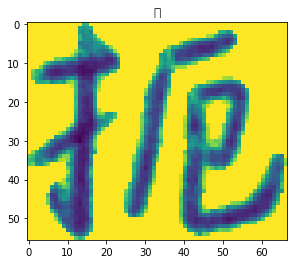

In [5]:
plt.imshow(imgs)
plt.title(labels)
plt.show()

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

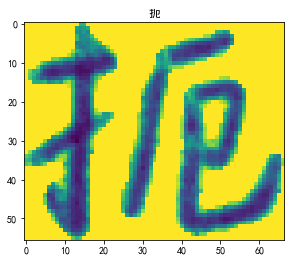

In [7]:
plt.imshow(imgs)
plt.title(labels);

In [8]:
labels = np.asanyarray([l for _, l in gnt])

In [16]:
labels.shape[0]

1246991

## POT

In [ ]:
class POT:
    # POT 文件的解码器
    def __init__(self, Z, set_name):
        self.Z = Z
        self.set_name = set_name # 数据集名称
    def __iter__(self):
        with self.Z.open(self.set_name) as fp:
            head = True
            while head:
                head = fp.read(2)
                if not head: # 判断文件是否读到结尾
                    break # 读到文件结尾立即结束
                head = struct.unpack('H', head)[0]
                stroke_num = struct.unpack('H', fp.read(2))[0]
                xy_start = struct.unpack('2h', fp.read(4))
                stroke_end = struct.unpack('2H', fp.read(4))
                xy_end = struct.unpack('2H', fp.read(4))
                yield 

In [14]:
image_s1 = [f'{root}/{name}' for name in os.listdir(root) if 'pot' in name] # POT 图片的源文件
image_s1

['E:/OCR/CASIA/data/OLHWDB1.0test_pot.zip',
 'E:/OCR/CASIA/data/OLHWDB1.0train_pot.zip',
 'E:/OCR/CASIA/data/OLHWDB1.1trn_pot.zip',
 'E:/OCR/CASIA/data/OLHWDB1.1tst_pot.zip']

In [15]:
Z = zipfile.ZipFile(f'{root}/OLHWDB1.1trn_pot.zip')
set_name = '1232-c.pot'

In [ ]:
fp = Z.open(set_name)
size = struct.unpack('H', fp.read(2))[0]

stroke_num = struct.unpack('H', fp.read(2))[0]
xy_start = struct.unpack('2h', fp.read(4))
stroke_end = struct.unpack('2H', fp.read(4))
xy_end = struct.unpack('2H', fp.read(4))

In [ ]:
xy_start, stroke_end, xy_end

In [ ]:
xy